<a href="https://colab.research.google.com/github/pradhan-pk/Brain-Tumor-Segmentation/blob/main/Brain_tumor_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation 

In [ ]:
import os
directory_path = '/content/drive/MyDrive/MRI Dataset'
os.chdir(directory_path)
os.getcwd()

'/content/drive/MyDrive/MRI Dataset'

In [ ]:
path = '/content/drive/MyDrive/MRI Dataset/Brain_MRI'

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install opencv-python

In [ ]:
pip install scikit-learn

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skimage.io as io
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [ ]:
%matplotlib inline

In [ ]:
brain_df = pd.read_csv('/content/drive/MyDrive/MRI Dataset/Brain_MRI/data_mask.csv')

In [ ]:
brain_df

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
...,...,...,...,...
3924,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,0
3925,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,0
3926,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,0
3927,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,0


In [ ]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [ ]:
brain_df.image_path[0]

'TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif'

In [ ]:
brain_df.mask_path[0]

'TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_mask.tif'

In [ ]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

<function matplotlib.pyplot.show>

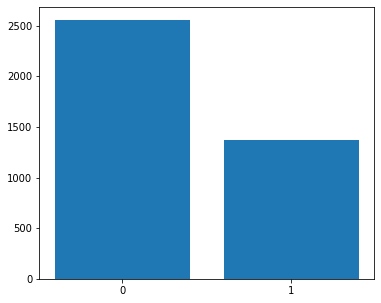

In [ ]:
fig = plt.figure(figsize = (6,5))
plt.bar(x = ['0', '1'], height=brain_df['mask'].value_counts())
plt.show

TypeError: ignored

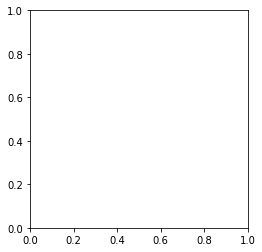

In [ ]:
image = cv2.imread(path + brain_df.image_path[1000])
plt.imshow(image)

TypeError: ignored

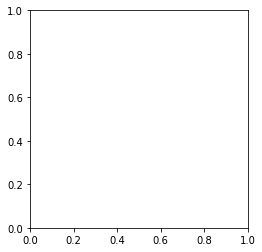

In [ ]:
image = cv2.imread(path + brain_df.mask_path[1000])
plt.imshow(image)

In [ ]:
cv2.imread(path + brain_df.image_path[1000]).max()
cv2.imread(path + brain_df.image_path[1000]).min()


AttributeError: ignored

TypeError: ignored

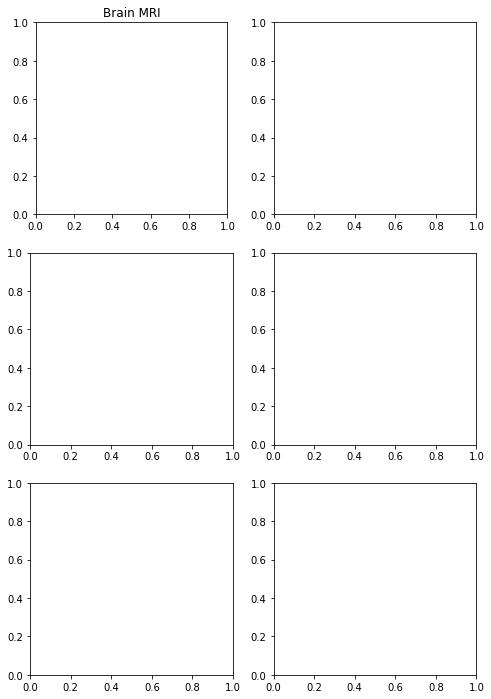

In [ ]:
fig, axs = plt.subplots(3, 2, figsize = (8,12))

count = 0
for x in range(3):
  i = random.randint(0, len(brain_df))
  axs[count][0].title.set_text("Brain MRI")
  axs[count][0].imshow(cv2.imread(path + brain_df.image_path[i]))
  axs[count][1].title.set_text("Mask")
  axs[count][1].imshow(cv2.imread(path + brain_df.mask_path[i]))
  count += 1
fig.tight_layout()

Preprocessing

In [ ]:
brain_df.head(5)

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0


In [ ]:
brain_df.shape

(3929, 4)

In [ ]:
b_df = brain_df.drop(columns = ['patient_id'])
b_df.shape

(3929, 3)

In [ ]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 92.2+ KB


In [ ]:
b_df['mask'] = b_df['mask'].apply(lambda x: str(x))

In [ ]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split
train, test = b_df = train_test_split(b_df, test_size = 0.15)

In [ ]:
test


,image_path,mask_path,mask
1978,TCGA_HT_8105_19980826/TCGA_HT_8105_19980826_18...,TCGA_HT_8105_19980826/TCGA_HT_8105_19980826_18...,1
1783,TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_17...,TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_17...,1
648,TCGA_DU_8164_19970111/TCGA_DU_8164_19970111_6.tif,TCGA_DU_8164_19970111/TCGA_DU_8164_19970111_6_...,0
1306,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_12...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_12...,0
3117,TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_33...,TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_33...,1
...,...,...,...
1546,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_15...,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_15...,0
1492,TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_14...,TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_14...,0
1889,TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_18...,TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_18...,1
1414,TCGA_HT_A616_19991226/TCGA_HT_A616_19991226_13...,TCGA_HT_A616_19991226/TCGA_HT_A616_19991226_13...,1


In [ ]:
train

,image_path,mask_path,mask
1526,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_14...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_14...,0
579,TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_6.tif,TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_6_...,0
1078,TCGA_HT_8107_19980708/TCGA_HT_8107_19980708_10...,TCGA_HT_8107_19980708/TCGA_HT_8107_19980708_10...,1
3639,TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_48...,TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_48...,0
2758,TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_27...,TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_27...,1
...,...,...,...
1410,TCGA_HT_8111_19980330/TCGA_HT_8111_19980330_13...,TCGA_HT_8111_19980330/TCGA_HT_8111_19980330_13...,0
1468,TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_14...,TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_14...,1
743,TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_7.tif,TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_7_...,1
2515,TCGA_FG_5964_20010511/TCGA_FG_5964_20010511_24...,TCGA_FG_5964_20010511/TCGA_FG_5964_20010511_24...,0


Data augmentation - increase our data by cropping, padding, flipping, rotating

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.15)

In [ ]:
train_generator = datagen.flow_from_dataframe(
    dataframe = train,
    directory = path,
    x_col = 'image_path',
    y_col = 'mask',
    subset = "training",
    batch_size = 16, 
    shuffle = False,
    class_mode = "categorical",
    target_size = (256,256)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe = train,
    directory = path,
    x_col = 'image_path',
    y_col = 'mask',
    subset = "validation",
    batch_size = 16, 
    shuffle = False,
    class_mode = "categorical",
    target_size = (256,256)
)

Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test,
    directory = path,
    x_col = 'image_path',
    y_col = 'mask',
    subset = "training",
    batch_size = 16, 
    shuffle = False,
    class_mode = "categorical",
    target_size = (256,256)
)

Found 590 validated image filenames belonging to 2 classes.


Transfer Learning - Save training time, less dataset required

In [ ]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor= Input(shape = (256,256,3)))

94773248/94765736 [==============================] - 1s 0us/step


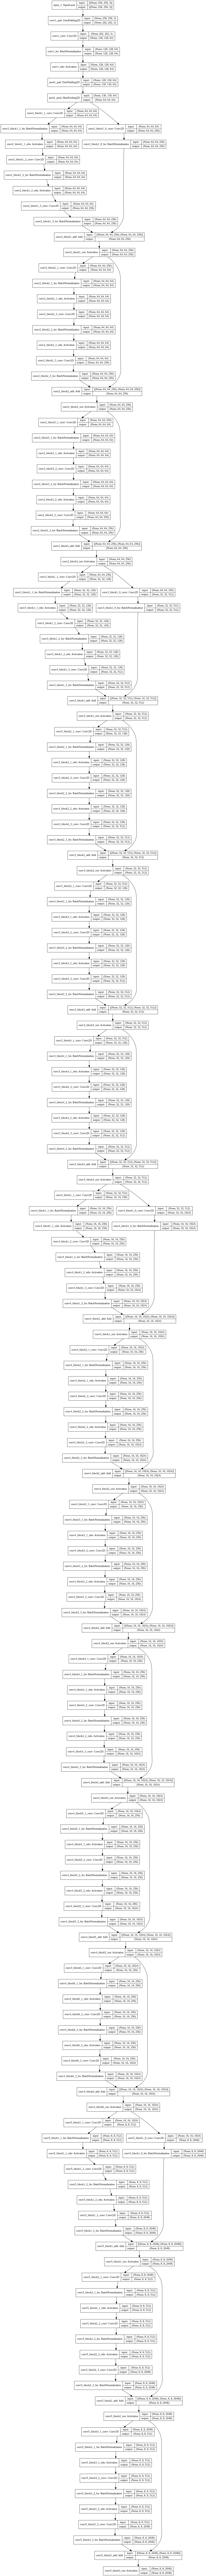

In [ ]:
plot_model(basemodel, to_file='model_plot.png', show_shapes=True)

In [ ]:
for layers in basemodel.layers:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = MaxPooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name='flatten')(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation='softmax')(headmodel)

model = Model(inputs=basemodel.input, outputs=headmodel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Calculating and Minimising loss

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Callback function

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

checkpointer = ModelCheckpoint(filepath='classifier-resnet-weights.hdf5', verbose=1)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//16,
    validation_data = valid_generator,
    callbacks = [earlystopping, checkpointer]
  )

177/177 [==============================] - 1089s 6s/step - loss: 0.9401 - accuracy: 0.6281 - val_loss: 0.6798 - val_accuracy: 0.5980

Epoch 00001: saving model to classifier-resnet-weights.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model_json = model.to_json()
with open("resnet.json", "w") as json_file:
  json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
with open('resnet.json','r') as json_file:
  savedmodel = json_file.read()

model = tf.keras.models.model_from_json(savedmodel)

In [ ]:
model.load_weights('classifier-resnet-weights.hdf5')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Prediction

In [ ]:
test_predict = model.predict(test_generator, steps=test_generator.n//16, verbose=1)

In [ ]:
test_predict.shape

In [ ]:
test_predict

In [ ]:
y_classes = []

for i in test_predict:
  y_classes.append(str(np.argmax(i)))     #returns index of maximum value in row

y_classes = np.array(y_classes)

In [ ]:
y_classes

In [ ]:
original = np.array(test['mask'])[:len(test_predict)]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(original, y_classes)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, y_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True)

##Deployment using Gradio

In [ ]:
pip install gradio


     |████████████████████████████████| 2.2 MB 9.2 MB/s 
     |████████████████████████████████| 1.9 MB 51.4 MB/s 
     |████████████████████████████████| 206 kB 63.2 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 961 kB 46.1 MB/s 
     |████████████████████████████████| 3.2 MB 48.2 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=4975289b5b13cdb86b8fbc603ca7c1420825eb6837035ea53148500cd1d37cfd
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=33404c6f249913702e9906081b3ec5cd09fc94b0dddc366bff3fc3a5270c409f
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
import gradio as gr

In [ ]:
def classify(img):
  img = img.reshape(-1, 256, 256, 3)
  pred = model.predict(img)
  ans = np.argmax(pred)
  if ans==0:
    return "Tumor Negative"
  else:
    return "Tumor Positive"


iface = gr.Interface(classify, gr.inputs.Image(), "text")
iface.launch()